회귀(Regression)

데이터 로딩

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

housing.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [19]:
data = pd.DataFrame(housing['data'],columns=housing['feature_names'])
target = pd.DataFrame(housing['target'], columns=['Target'])

print(data.shape)
print(target.shape)

(20640, 8)
(20640, 1)


In [20]:
#8개 설명 변수가 담긴 data 데이터프레임과 목표 변수 데이터를 갖는 target 데이터프레임을 결합

df = pd.concat([data,target],axis = 1)
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


데이터 탐색

In [22]:
#기본 정보
df.info()

#모든 데이터 값이 숫자로만 구성되었네 -> 머신러닝 알고리즘에 바로 입력하여 계산이 가능하네

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [23]:
#결측값 확인
df.isnull().sum()

#9개 열 모두 결측값 없다.

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Target        0
dtype: int64

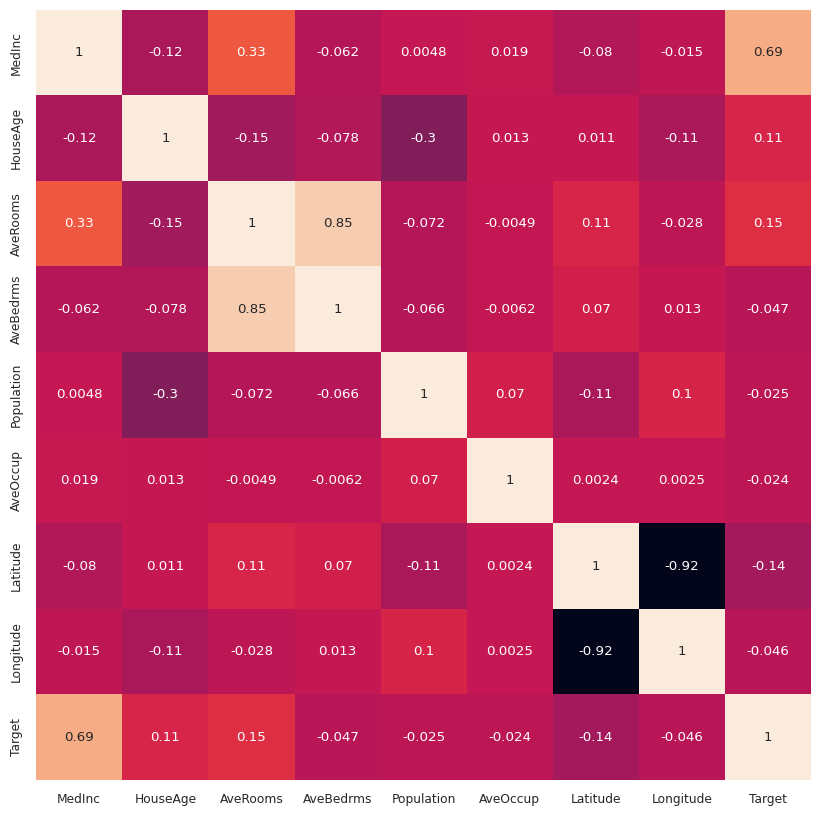

In [26]:
#상관 관계 행렬
df_corr = df.corr()

#히트맵 그리기
plt.figure(figsize=(10,10))
sns.set(font_scale=0.8)
sns.heatmap(df_corr,annot=True,cbar=False)
plt.show()


In [27]:
#목표 변수인 Target 열과 상관 계수가 높은 순서대로 열 이름과 상관 계수를 출력해보자.

#행 기준으로는 Target을 제외한 나머지 변수들을 모두 선택해야겠지.
#열 기준으로는 Target을 선택하고

#변수 간의 상관 관계 분석 -Target 변수와 상관 관계가 높은 순서대로 정리
corr_order = df.corr().loc[:'Longitude','Target'].abs().sort_values(ascending=False)
corr_order

MedInc        0.688075
AveRooms      0.151948
Latitude      0.144160
HouseAge      0.105623
AveBedrms     0.046701
Longitude     0.045967
Population    0.024650
AveOccup      0.023737
Name: Target, dtype: float64

In [28]:
#데이터 분포를 파악하는 좋은 방법은 그래프를 그려보는 것
#target 변수와 함께 상관 계수가 높은 순서대로 4개 추출해서 plot_df에 저장해서 시각화 해보자

plot_cols = ['Target','MedInc','AveRooms','Latitude','HouseAge']
plot_df = df.loc[:,plot_cols]
plot_df.head()

,Target,MedInc,AveRooms,Latitude,HouseAge
0,4.526,8.3252,6.984127,37.88,41.0
1,3.585,8.3014,6.238137,37.86,21.0
2,3.521,7.2574,8.288136,37.85,52.0
3,3.413,5.6431,5.817352,37.85,52.0
4,3.422,3.8462,6.281853,37.85,52.0


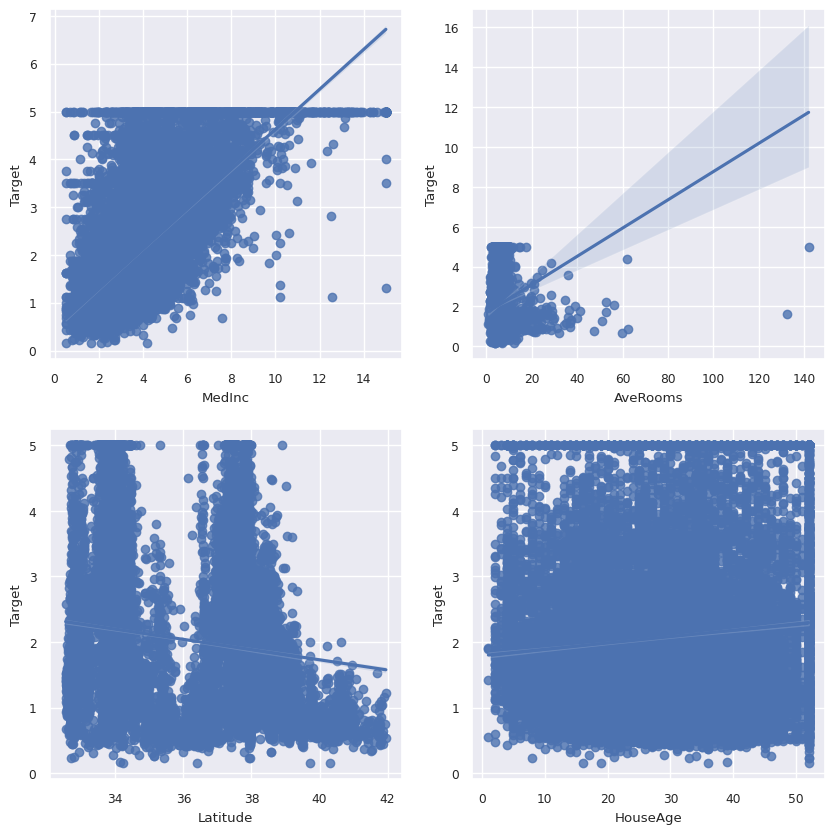

In [29]:
#regplot으로 선형 회귀선을 산점도에 표시해보자
plt.figure(figsize=(10,10))
for idx, col in enumerate(plot_cols[1:]):
  axl = plt.subplot(2,2,idx+1)
  sns.regplot(x=col, y=plot_cols[0],data=plot_df, ax=axl)
plt.show()

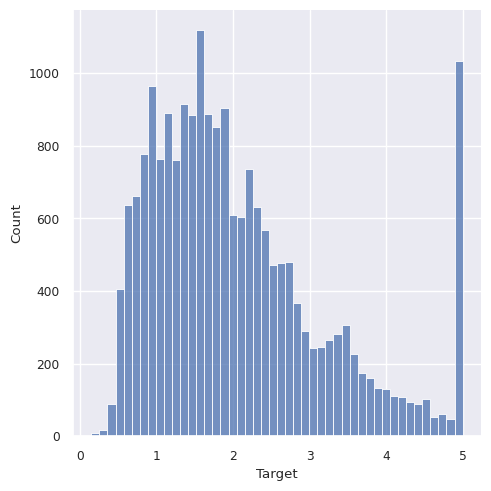

In [30]:
sns.displot(x='Target',kind='hist',data=df)
plt.show()

데이터 전처리

피처 스케일링

각 피처(열)의 데이터 크기에 따른 상대적 영향력의 차이를 제거하기 위하여 피처의 크기를 비슷한 수준으로 맞춰주는 작업이 필요하다

Target 열을 제외한 나머지 8개 피처 데이터를 iloc인덱서로 추출하고
마지막 열을 나타내는 -1을 포함하지 않아보자.

이 데이터를 MinMaxScaler 인스턴스 객체에 fit 메소드로 각 열의 데이터를 최소값 0, 최대값1 사이로 변환하는 식을 학습할 것임

In [32]:
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()

df_scaled = df.iloc[:,:-1]  #target 피쳐 제외
scaler.fit(df_scaled)
df_scaled = scaler.transform(df_scaled) #학습한 변환식을 실제로 적용하여 데이터를 정규화 변환한다.

#스케일링 변환된 값을 데이터프레임에 반영
df.iloc[:,:-1] = df_scaled[:,:]
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,0.539668,0.784314,0.043512,0.020469,0.008941,0.001499,0.567481,0.211155,4.526
1,0.538027,0.392157,0.038224,0.018929,0.067210,0.001141,0.565356,0.212151,3.585
2,0.466028,1.000000,0.052756,0.021940,0.013818,0.001698,0.564293,0.210159,3.521
3,0.354699,1.000000,0.035241,0.021929,0.015555,0.001493,0.564293,0.209163,3.413
4,0.230776,1.000000,0.038534,0.022166,0.015752,0.001198,0.564293,0.209163,3.422


학습 데이터와 테스트 데이터 분할

MedInc	AveRooms 이 target과 강한 선형 관계를 나타내고 있으므로 목표변수와 상관 계수가 가장 큰 이 둘을 학습 데이터(X_data)로 선택

20640개의 샘플 중 20%를 모델 평가에 사용 (16512 : 4128)

In [33]:
from sklearn.model_selection import train_test_split
X_data = df.loc[:,['MedInc','AveRooms']]
y_data = df.loc[:,'Target']
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data,
                                                    test_size = 0.2,
                                                    shuffle= True,
                                                    random_state= 12)
print(X_train.shape, y_train.shape)
print(X_test.shape,y_test.shape)

(16512, 2) (16512,)
(4128, 2) (4128,)


일반적으로 검증 데이터를 10~30% 수준으로 설정
교차 검증을 하더라도 검증 데이터의 비중이 낮으면 훈련 데이터에 과대적합하는 것을 막기 어렵다.
반대로 검증 데이터가 너무 많으면 모델 학습에 필요한 데이터가 부족해서 학습이 잘 안될 수 있다.

베이스라인 모델 - 선형 회귀 (Linear Regression)

In [34]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

print("회귀계수(기울기): ",np.round(lr.coef_, 1))
print("상수항(절편): ", np.round(lr.intercept_, 1))

회귀계수(기울기):  [ 6.3 -4.8]
상수항(절편):  0.8


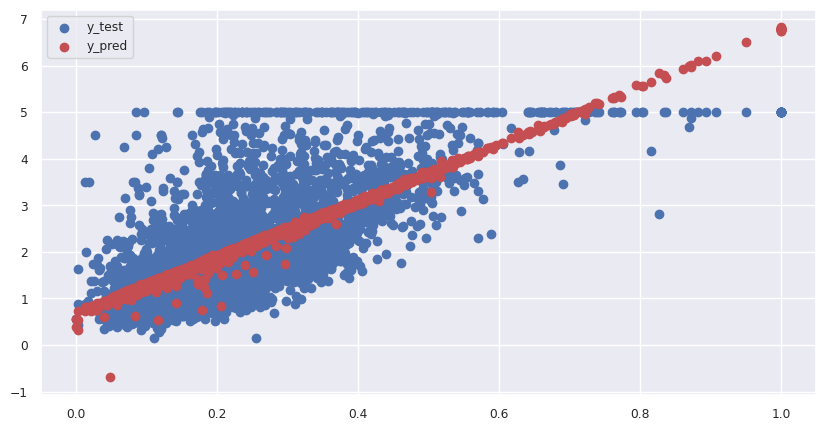

In [36]:
#예측
y_test_pred = lr.predict(X_test)

#예측값, 실제값의 분포
plt.figure(figsize=(10,5))
plt.scatter(X_test['MedInc'], y_test, label='y_test')
plt.scatter(X_test['MedInc'], y_test_pred, c='r', label= 'y_pred' ) #r = red
plt.legend(loc='best')  #범례 (best, right, left)
plt.show()

정답과 예측값의 오차가 상당한 편 --> 잔차(residual) 심하다

모델 성능을 평가할 때 수치화된 성능 지표를 사용하는데


회귀 모델의 경우, MAE, MSE, RMSE 등이 존재함.

In [37]:
#평가
from sklearn.metrics import mean_squared_error
y_train_pred = lr.predict(X_train)

train_mse = mean_squared_error(y_train, y_train_pred)
print("Train MSE:%.4f "%train_mse)

test_mse = mean_squared_error(y_test, y_test_pred)
print("Test MSE: %.4f"% test_mse)


Train MSE:0.6937 
Test MSE: 0.6916


cross_val_score함수를 이용하여 K-Fold 교차 검증을 수행해보자

cv옵션에 폴드 5개 설정, 평가 지표는 MSE

In [39]:
from sklearn.model_selection import cross_val_score
lr = LinearRegression()
mse_scores = -1 * cross_val_score(lr, X_train,y_train,cv=5,
                                  scoring = 'neg_mean_squared_error')
#cross_val_score 함수가 음수로 계산하기에 양수로 변환하기 위하여 -1을 곱함

print("개별 Fold의 MSE:", np.round(mse_scores,4))
print("평균 MSE: %.4f"%np.mean(mse_scores))

#실행 결과에서 5개의 폴드의 MSE는 큰 편차 없이 비교적 고른 편인 걸 알 수 있다.
#모델의 일반화 성능이 양호하다!

개별 Fold의 MSE: [0.7001 0.6701 0.7237 0.6549 0.7308]
평균 MSE: 0.6959


과대적합 회피(L2 / L1 규제)

과대적합(overfitting)은 모델이 학습에 사용한 데이터와 비슷한 데이터는 잘 예측하지만, 경험해보지 못한 새로운 특성을 갖는 데이터에 대해서는 예측력이 떨어지는 현상을 말함.

모델이 훈련 데이터에 지나치게 적응해버리는 상황이 될 수 있는데 이런 경우 훈련 데이터와 차이가 큰 새로운 데이터에 대해서는 모델이 학습한 패턴으로는 잘 설명되지 않는 경우가 발생

과소적합(underfitting)은 훈련 데이터의 특성을 파악하기 충분하지 않을 정도로 모델의 구성이 단순하거나 데이터 개수가 부족할 때 발생

1차항으로 이루어진 일차함수식으로 복잡한 데이터를 예측하기 어려울 수 있다.

단항식이 아닌 다항식으로 선형 회귀식을 만들면 복잡한 구조를 갖게 되어 모델의 예측력을 높일 수 있다!

중간 상태의 균형점을 찾는 것이 필요!

In [40]:
#2차 다항식 변환
#PolynomialFeatures함수의 degree 옵션 2차로 지정하고 데이터를 입력하면 데이터셋을 2차함수식으로 변환됨
#이때 각 피처에 대한 2차항이 추가되어 피처 개수가 늘어난다.

from sklearn.preprocessing import PolynomialFeatures
pf = PolynomialFeatures(degree=2)
X_train_poly = pf.fit_transform(X_train)
print("원본 학습 데이터셋: ",X_train.shape)
print("2차 다항식 변환 데이터셋: ",X_train_poly.shape)

원본 학습 데이터셋:  (16512, 2)
2차 다항식 변환 데이터셋:  (16512, 6)


In [44]:
#2차 다항식 변환 데이터셋으로 선형 회귀 모형 학습
lr = LinearRegression()
lr.fit(X_train_poly, y_train)

#테스트 데이터에 대한 예측 및 평가
y_train_pred = lr.predict(X_train_poly)
train_mse = mean_squared_error(y_train, y_train_pred)
print("Train MSE: %.4f"%train_mse)

X_test_poly = pf.fit_transform(X_test)
y_test_pred = lr.predict(X_test_poly)
test_mse = mean_squared_error(y_test, y_test_pred)
print("Test MSE: %.4f"%test_mse)

Train MSE: 0.6722
Test MSE: 0.6674


과대적합 예시

In [45]:
#15차 다항식으로 변환해보자
#Train MSE는 감소하였지만 TEST MSE는 급격하게 증가한다. 즉 과대적합 상태로 신규 데이터에 대한 예측력이 상실한 것!

pf = PolynomialFeatures(degree = 15)
X_train_poly = pf.fit_transform(X_train)

lr = LinearRegression()
lr.fit(X_train_poly, y_train)

y_train_pred = lr.predict(X_train_poly)
train_mse = mean_squared_error(y_train, y_train_pred)
print("Train_MSE: %.4f"%train_mse)

X_test_poly = pf.fit_transform(X_test)
y_test_pred = lr.predict(X_test_poly)
test_mse = mean_squared_error(y_test, y_test_pred)
print("Test MSE: %.4f"%test_mse)

Train_MSE: 0.5980
Test MSE: 37688595.7036


몇차항일 때 가장 적합할까?

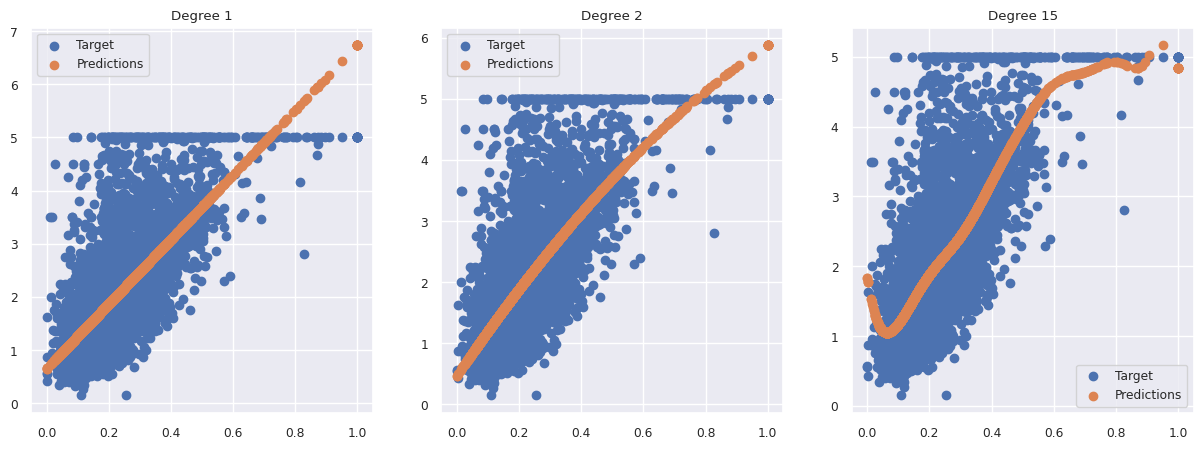

In [46]:
#다항식 차수에 따른 모델 적합도 변화
plt.figure(figsize=(15,5))

for n, deg in enumerate([1,2,15]):
  ax1 = plt.subplot(1,3,n+1)
  #plt.axis ('off')
  #degree 별 다항 회귀 모형 적용
  pf = PolynomialFeatures(degree=deg)
  X_train_poly = pf.fit_transform(X_train.loc[:,['MedInc']])
  X_test_poly = pf.fit_transform(X_test.loc[:,['MedInc']])
  lr = LinearRegression()
  lr.fit(X_train_poly, y_train)
  y_test_pred = lr.predict(X_test_poly)

  #실제값 분포
  plt.scatter(X_test.loc[:,['MedInc']], y_test, label = 'Target')
  #예측값 분포
  plt.scatter(X_test.loc[:,['MedInc']],y_test_pred, label='Predictions' )
  #제목 표시
  plt.title("Degree %d"%deg)
  #범례 표시
  plt.legend()
plt.show()

L2/L1 규제 (모델의 구조를 간결하게 하는 방법)

L2 규제는 모델의 '가중치의 제곱합'에 페널티를 부과

L1 규제는 '가중치의 절대값의 합'에 페널티를 부과

In [50]:
#Ridge모델은 선형회귀 모형에 L2 규제를 구현한 알고리즘
#알파 값으로 L2규제 강도를 조절하는데 증가시키면 규제 강도가 커지고 모델의 가중치를 감소시킨다.

from sklearn.linear_model import Ridge
rdg = Ridge(alpha=2.5)
rdg.fit(X_train_poly, y_train)

y_train_pred = rdg.predict(X_train_poly)  #15차항
train_mse = mean_squared_error(y_train, y_train_pred)
print("Train MSE: %.4f"% train_mse)

y_train_pred= rdg.predict(X_test_poly)
test_mse = mean_squared_error(y_test, y_train_pred)
print("Test MSE: %.4f"%test_mse)

#15차항으로 변환한 데이터를 사용해도 훈련 오차와 테스트 오차 값의 차이가 크지 않아 과대적합 문제가 해소되었다는 것을 알 수 있다.

Train MSE: 0.6849
Test MSE: 0.6855


In [52]:
#Lasso 모델은 선형회귀 모형에 L1 규제를 구현한 알고리즘
from sklearn.linear_model import Lasso
las = Lasso(alpha=0.05)
las.fit(X_train_poly, y_train)

y_train_pred = las.predict(X_train_poly)  #15차항
train_mse = mean_squared_error(y_train, y_train_pred)
print("%.4f"%train_mse)
y_test_pred = las.predict(X_test_poly)
test_mse = mean_squared_error(y_test, y_test_pred)
print("%.4f"%test_mse)

#마찬가지로 훈련 오차와 테스트 오차 값의 차이가 크지 않아 과대적합 문제없네

0.8495
0.8588


In [55]:
#ElasticNet 알고리즘은 L2, L1 규제를 모두 적용한 선형 회귀 모델
#alpha 값은 L2, L1 강도의 합
#l1_ratio 옵션은 L1 규제 강도의 상대적 비율을 조정
#ex) l1_ratio 가 0이면, L2 규제와 동일, 1이면 L1규제와 동일

from sklearn.linear_model import ElasticNet
ela = ElasticNet(alpha=0.01, l1_ratio = 0.7)
ela.fit(X_train_poly, y_train)

y_train_pred = ela.predict(X_train_poly)
train_mse = mean_squared_error(y_train, y_train_pred)
print("%.4f"% train_mse)
y_test_pred = ela.predict(X_test_poly)
test_mse = mean_squared_error(y_test, y_test_pred)
print("%.4f"%test_mse)

0.7297
0.7326


트리 기반 모델 - 비선형 회귀

하나의 트리를 사용함

In [56]:
#의사결정나무
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(max_depth = 3, random_state =12 )
dtr.fit(X_train, y_train)

y_train_pred = dtr.predict(X_train)
train_mse = mean_squared_error(y_train, y_train_pred)
print("Train_Mse: %.4f"%train_mse)

y_test_pred = dtr.predict(X_test)
test_mse = mean_squared_error(y_test,y_test_pred)
print("Test_MSE: %.4f"%test_mse)

#선형 회귀 모델에 비하여 예측 오차가 낮은 편이고 Train 과 Test의 MSE 차이도 크지 않다

Train_Mse: 0.6830
Test_MSE: 0.6871


랜덤 포레스트

여러 개의 트리 모델이 예측한 값을 종합하기 때문에 전체 예측력을 높일 수 있다.

다만, 약간 과대적합된 경향이 있다.

In [58]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(max_depth=3, random_state=12)
rfr.fit(X_train,y_train)

y_train_pred = rfr.predict(X_train)
train_mse = mean_squared_error(y_train, y_train_pred)
print("%.4f"%train_mse)

y_test_pred = rfr.predict(X_test)
test_mse = mean_squared_error(y_test, y_test_pred)
print("%.4f"%test_mse)


0.6605
0.6646


XGBoost 부스팅 알고리즘

랜덤 포레스트와 비교해보면 모델의 예측력은 향상된 것으로 보이지만, Train과 Test의 차이가 커져 과대적합이 심화되었다. (이 경우는 그렇게 심화되진 않음)

데이터의 개수가 작으면 XGBoost와 같이 복잡도가 높은 알고리즘이 쉽게 과대적합될 위험성이 있다.

XGBoost 알고리즘은 데이터의 개수가 비교적 많고, 모델 예측 난이도가 높은 경우 탁월한 성능을 보임

In [59]:
from xgboost import XGBRegressor
xgbr = XGBRegressor(objective='reg:squarederror',max_depth=3, random_state=12)
xgbr.fit(X_train,y_train)

y_train_pred = xgbr.predict(X_train)
train_mse = mean_squared_error(y_train, y_train_pred)
print("%.4f"%train_mse)
y_test_pred = xgbr.predict(X_test)
test_mse = mean_squared_error(y_test, y_test_pred)
print("%.4f"%test_mse)

0.5653
0.6013
